In [1]:
import pandas as pd
import numpy as np
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '../scripts')))

In [2]:
from utils import *

In [3]:
# Loading the fie
df = pd.read_csv('../data/MachineLearningRating_v3.txt', delimiter='|', low_memory=False)


In [58]:
df.shape

(1000098, 52)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000098 entries, 0 to 1000097
Data columns (total 52 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   UnderwrittenCoverID       1000098 non-null  int64  
 1   PolicyID                  1000098 non-null  int64  
 2   TransactionMonth          1000098 non-null  object 
 3   IsVATRegistered           1000098 non-null  bool   
 4   Citizenship               1000098 non-null  object 
 5   LegalType                 1000098 non-null  object 
 6   Title                     1000098 non-null  object 
 7   Language                  1000098 non-null  object 
 8   Bank                      854137 non-null   object 
 9   AccountType               959866 non-null   object 
 10  MaritalStatus             991839 non-null   object 
 11  Gender                    990562 non-null   object 
 12  Country                   1000098 non-null  object 
 13  Province                  1

In [11]:
df[['TotalClaims', 'TotalPremium']].describe()

,TotalClaims,TotalPremium
count,1.000098e+06,1.000098e+06
mean,6.486119e+01,6.190550e+01
std,2.384075e+03,2.302845e+02
min,-1.200241e+04,-7.825768e+02
25%,0.000000e+00,0.000000e+00
50%,0.000000e+00,2.178333e+00
75%,0.000000e+00,2.192982e+01
max,3.930921e+05,6.528260e+04


# Handling Missing values 

In [7]:
missing_values_table(df)

Your selected dataframe has 52 columns.
There are 22 columns that have missing values.


,Missing Values,% of Total Values,Dtype
NumberOfVehiclesInFleet,1000098,100.0,float64
CrossBorder,999400,99.9,object
CustomValueEstimate,779642,78.0,float64
Converted,641901,64.2,object
Rebuilt,641901,64.2,object
WrittenOff,641901,64.2,object
NewVehicle,153295,15.3,object
Bank,145961,14.6,object
AccountType,40232,4.0,object
Gender,9536,1.0,object


In [4]:
# Droping columns for high number of missing values(NumberOfVehiclesInFleet, CrossBorder and CustomValueEstimate)
df.drop(['NumberOfVehiclesInFleet', 'CrossBorder', 'CustomValueEstimate'], axis=1, inplace=True, errors='ignore')
df.dropna(subset=['mmcode'], inplace=True)

# Convert 'CapitalOutstanding' to numeric, filling NaN values with the mean in a single step without inplace
df['CapitalOutstanding'] = pd.to_numeric(df['CapitalOutstanding'], errors='coerce')

# Fill NaN values with the mean of the column
df['CapitalOutstanding'] = df['CapitalOutstanding'].fillna(df['CapitalOutstanding'].mean())

# Filling missing values in other columns with their appropriate values
df['NewVehicle'] = df['NewVehicle'].fillna('More than 6 months')
df['MaritalStatus'] = df['MaritalStatus'].fillna('Not specified')
df['AccountType'] = df['AccountType'].fillna('Not specified')
df['Gender'] = df['Gender'].fillna('Not specified')
df['WrittenOff'] = df['WrittenOff'].fillna('No')
df['Rebuilt'] = df['Rebuilt'].fillna('No')
df['Converted'] = df['Converted'].fillna('No')
df['Bank'] = df['Bank'].fillna('Unknown')

In [9]:
# Checking for any missing values
missing_values_table(df)

Your selected dataframe has 49 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values,Dtype


converting VehicleIntroDate and TransactionMonth columns to datetime format.

In [10]:
df['VehicleIntroDate'] = pd.to_datetime(df['VehicleIntroDate'], format='%m/%Y', errors='coerce')

# Convert to datetime
df['TransactionMonth'] = pd.to_datetime(df['TransactionMonth'])

# Format to MM/YYYY
df['TransactionMonthFormatted'] = df['TransactionMonth'].dt.to_period('M')

# Outliers Detection and Handling

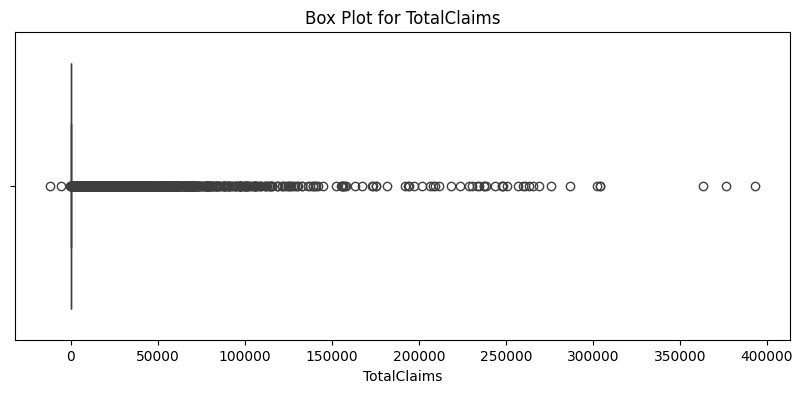

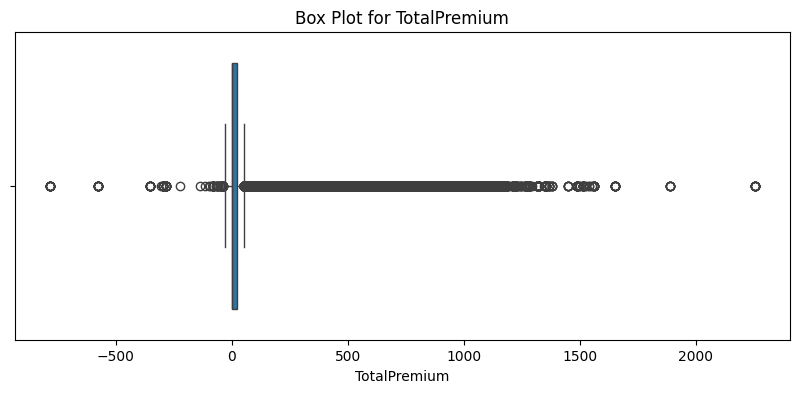


Outliers Summary:

Column: TotalClaims
 - Outliers Count: 1307
 - Outliers Percentage: 0.13%

Column: TotalPremium
 - Outliers Count: 36229
 - Outliers Percentage: 3.62%



In [6]:
# detection of outliers in key columns, TotalClaim and TotalPremium
outlier_columns = ['TotalClaims', 'TotalPremium']
Outliers_detected = detect_outliers(df,outlier_columns)
print(Outliers_detected)

Fixing Outlayers

In [7]:
# Fixing the outliers in TotalClaim and TotalPremium columns
fix_outlier(df, outlier_columns)

,TotalClaims,TotalPremium
0,0.0,21.929825
1,0.0,21.929825
2,0.0,0.000000
3,0.0,2.179737
4,0.0,0.000000
...,...,...
1000093,0.0,347.235175
1000094,0.0,347.235175
1000095,0.0,347.235175
1000096,0.0,2.315000


# Univariate Analysis

In [8]:
df.TotalPremium.value_counts()

TotalPremium
0.000000      381302
2.179737       50098
21.929825      49710
74.561404      34374
78.947368      30392
               ...  
116.300444         1
2.426075           1
74.830990          1
0.908933           1
182.449177         1
Name: count, Length: 33711, dtype: int64

c:\Users\a\Documents\GitHub\CarInsurance-Risk-Analytics\.venv\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\a\Documents\GitHub\CarInsurance-Risk-Analytics\.venv\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


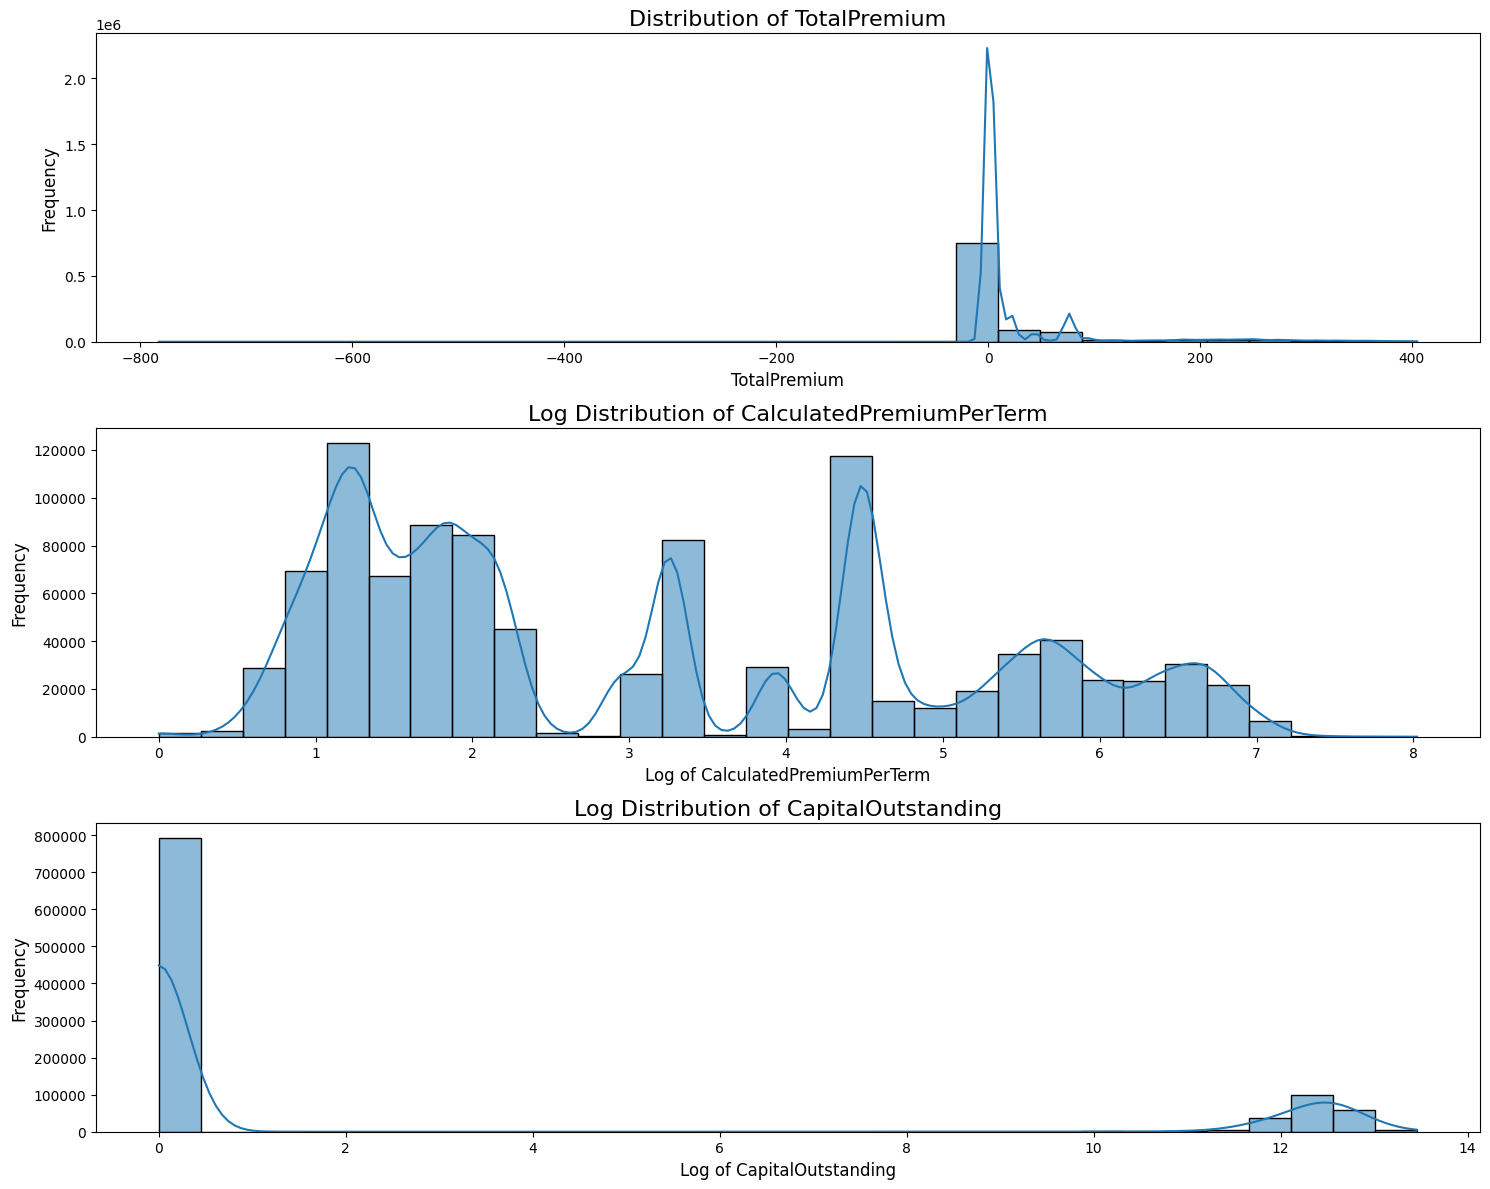

In [10]:
univariate_num_columns = ['TotalPremium','CalculatedPremiumPerTerm', 'CapitalOutstanding']
plot_histograms(df, univariate_num_columns)

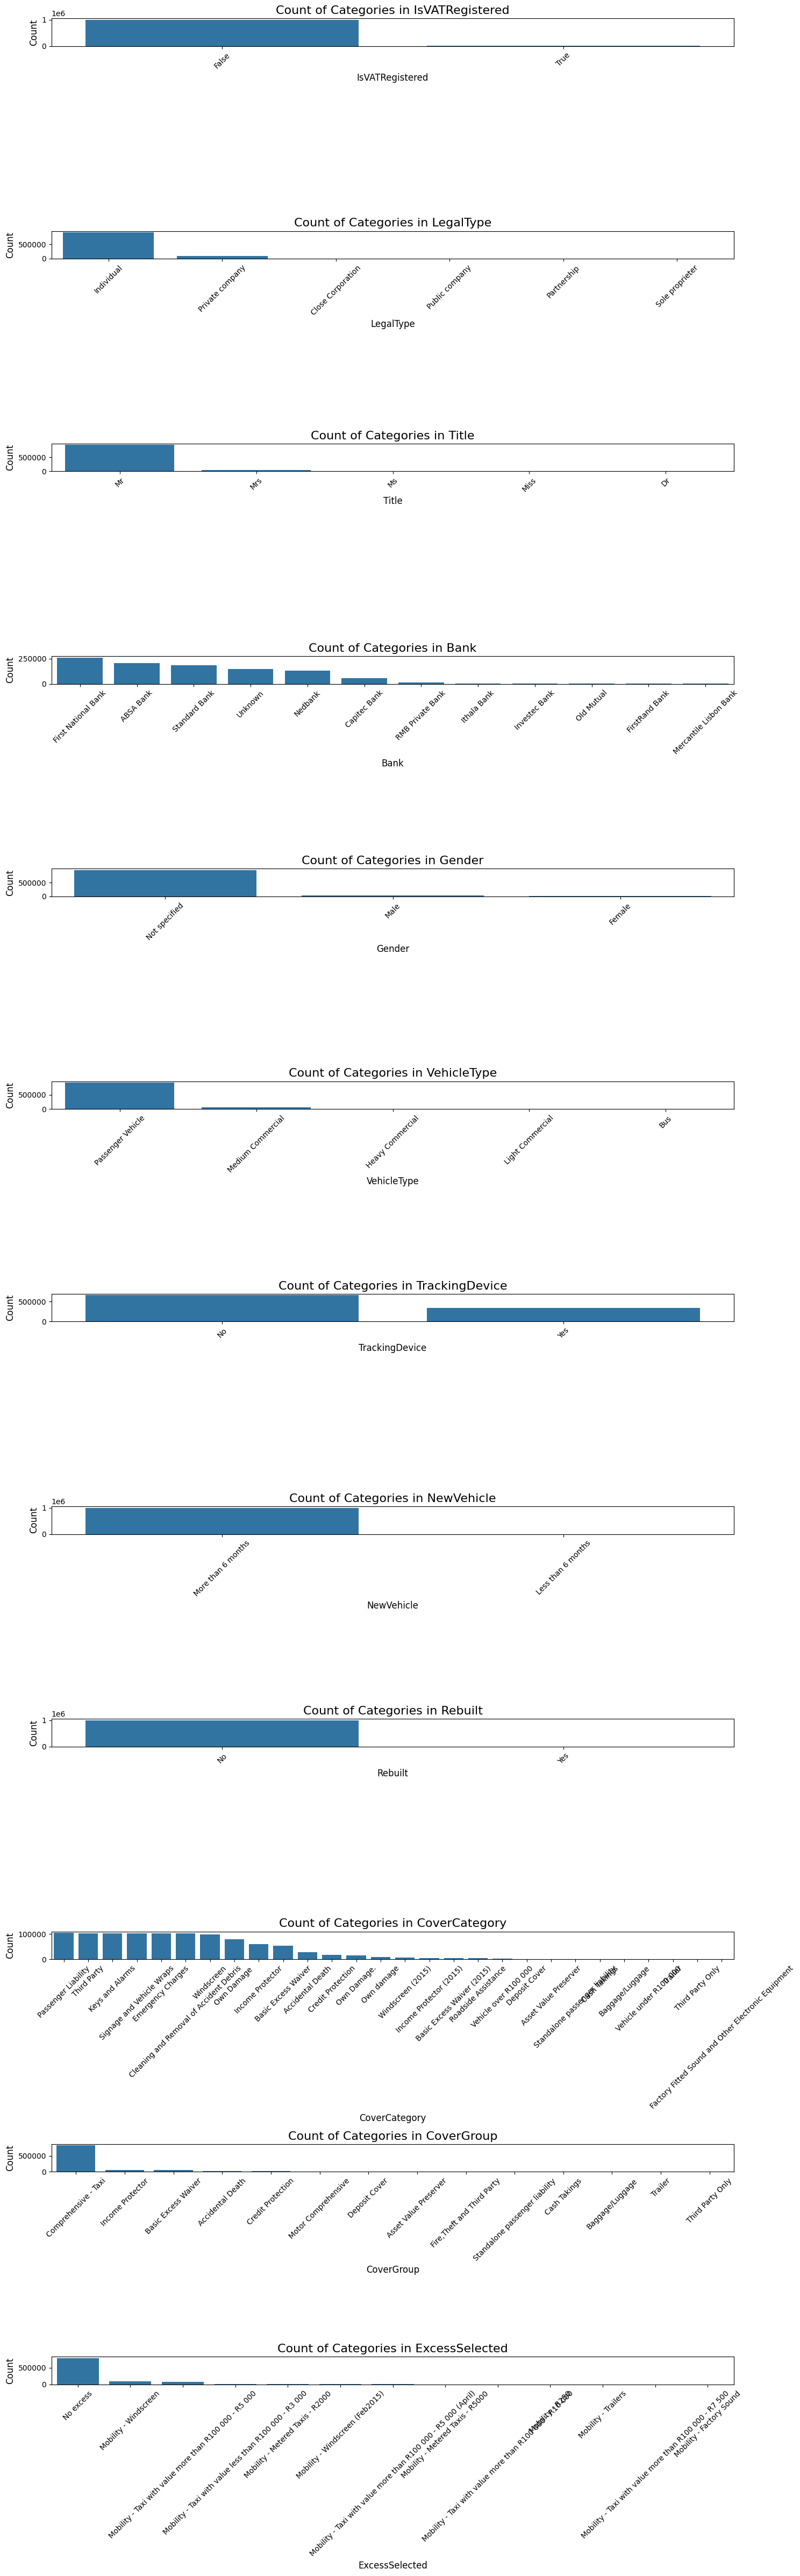

In [9]:
univariate_cat_columns = ['IsVATRegistered', 'LegalType','Title', 'Bank','Gender','VehicleType', 'TrackingDevice', 'NewVehicle', 'Rebuilt', 'CoverCategory', 'CoverGroup', 'ExcessSelected']
plot_bar_charts(df, univariate_cat_columns)